### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(["EIN", "NAME"], axis=1, inplace=True)

In [3]:
# Determine the number of unique values in each column.
# Generate our categorical variable list
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_df[application_cat].nunique()

APPLICATION_TYPE          17
AFFILIATION                6
CLASSIFICATION            71
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
app_type_counts = application_df.APPLICATION_TYPE.value_counts()
app_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

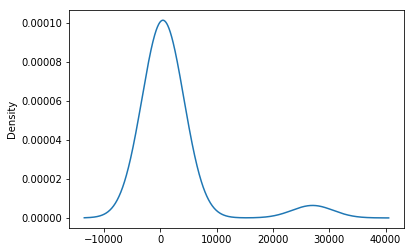

In [6]:
# Visualize the value counts of APPLICATION_TYPE
app_type_counts.plot.density()

In [7]:
# Determine which values to replace if counts are less than ...?
replace_application = list(app_type_counts[app_type_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [8]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C2300       32
C7200       32
C1240       30
C8000       20
C7120       18
C1500       16
C6000       15
C1800       15
C1250       14
C8200       11
C1238       10
C1278       10
C1237        9
         ...  
C3200        2
C1234        2
C1246        2
C1267        2
C2190        1
C2570        1
C2600        1
C4120        1
C1732        1
C4200        1
C4500        1
C2380        1
C2170        1
C6100        1
C1245        1
C2561        1
C1248        1
C1370        1
C2500        1
C1728        1
C1900        1
C1570        1
C1236        1
C3700        1
C2150        1
C1283        1
C1820        1
C8210        1
C5200        1
C1580        1
Name: CLASSIFICATION, Length: 71, dtype: int64

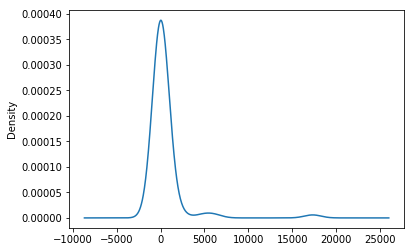

In [9]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [10]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts < 500].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [11]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [12]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [15]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [37]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 80)                3600      
_________________________________________________________________
dense_10 (Dense)             (None, 30)                2430      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 31        
Total params: 6,061
Trainable params: 6,061
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Compile the model, using the binary_crossentropy loss function, adam optimizer, 
# and accuracy metrics as a binary classifier
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [40]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=50)
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
804/804 [==============================] - 1s 1ms/step - loss: 6141.2261 - accuracy: 0.5212
Epoch 2/50
804/804 [==============================] - 1s 1ms/step - loss: 6280.1885 - accuracy: 0.5153
Epoch 3/50
804/804 [==============================] - 1s 2ms/step - loss: 6374.7158 - accuracy: 0.4925A: 0s - loss: 6428.3203 - accura
Epoch 4/50
804/804 [==============================] - 1s 1ms/step - loss: 9230.6709 - accuracy: 0.4977
Epoch 5/50
804/804 [==============================] - 1s 2ms/step - loss: 1963.2057 - accuracy: 0.4993
Epoch 6/50
804/804 [==============================] - 1s 1ms/step - loss: 5522.7402 - accuracy: 0.5135
Epoch 7/50
804/804 [==============================] - 1s 2ms/step - loss: 2866.9517 - accuracy: 0.5014
Epoch 8/50
804/804 [==============================] - 1s 2ms/step - loss: 5979.0142 - accuracy: 0.4918
Epoch 9/50
804/804 [==============================] - 1s 1ms/step - loss: 1598.7480 - accuracy: 0.5227
Epoch 10/50
804/804 [====================

In [27]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [28]:
# Compile the model using the binary_crossentropy loss function, adam optimizer, 
# and accuracy metrics as a binary classifier
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [41]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    #save_freq=1000
    save_freq=250)

In [42]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=50,callbacks=[cp_callback])

Epoch 1/50
228/804 [=======>......................] - ETA: 0s - loss: 0.5910 - accuracy: 0.7152
Epoch 00001: saving model to checkpoints/weights.01.hdf5
472/804 [================>.............] - ETA: 0s - loss: 0.5782 - accuracy: 0.7225
Epoch 00001: saving model to checkpoints/weights.01.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.5725 - accuracy: 0.7237
Epoch 00001: saving model to checkpoints/weights.01.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5720 - accuracy: 0.7228
Epoch 2/50
168/804 [=====>........................] - ETA: 0s - loss: 0.5452 - accuracy: 0.7388
Epoch 00002: saving model to checkpoints/weights.02.hdf5
438/804 [===============>..............] - ETA: 0s - loss: 0.5584 - accuracy: 0.7298
Epoch 00002: saving model to checkpoints/weights.02.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 0.5556 - accuracy: 0.7304
Epoch 00002: saving model to checkpoints/weights.02.hdf5
804/804 [============================

804/804 [==============================] - 2s 2ms/step - loss: 0.5438 - accuracy: 0.7360
Epoch 16/50
182/804 [=====>........................] - ETA: 1s - loss: 0.5258 - accuracy: 0.7498
Epoch 00016: saving model to checkpoints/weights.16.hdf5
428/804 [==============>...............] - ETA: 0s - loss: 0.5348 - accuracy: 0.7438
Epoch 00016: saving model to checkpoints/weights.16.hdf5
659/804 [=======================>......] - ETA: 0s - loss: 0.5418 - accuracy: 0.7377
Epoch 00016: saving model to checkpoints/weights.16.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5433 - accuracy: 0.7362
Epoch 17/50
106/804 [==>...........................] - ETA: 1s - loss: 0.5386 - accuracy: 0.7370
Epoch 00017: saving model to checkpoints/weights.17.hdf5
361/804 [============>.................] - ETA: 0s - loss: 0.5430 - accuracy: 0.7357
Epoch 00017: saving model to checkpoints/weights.17.hdf5
619/804 [======================>.......] - ETA: 0s - loss: 0.5447 - accuracy: 0.7355
Epo

667/804 [=======================>......] - ETA: 0s - loss: 0.5393 - accuracy: 0.7390
Epoch 00030: saving model to checkpoints/weights.30.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5405 - accuracy: 0.7383
Epoch 31/50
125/804 [===>..........................] - ETA: 1s - loss: 0.5448 - accuracy: 0.7343
Epoch 00031: saving model to checkpoints/weights.31.hdf5
366/804 [============>.................] - ETA: 0s - loss: 0.5469 - accuracy: 0.7350
Epoch 00031: saving model to checkpoints/weights.31.hdf5
603/804 [=====================>........] - ETA: 0s - loss: 0.5403 - accuracy: 0.7395
Epoch 00031: saving model to checkpoints/weights.31.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5401 - accuracy: 0.7386
Epoch 32/50
 70/804 [=>............................] - ETA: 1s - loss: 0.5284 - accuracy: 0.7482
Epoch 00032: saving model to checkpoints/weights.32.hdf5
305/804 [==========>...................] - ETA: 0s - loss: 0.5373 - accuracy: 0.7417
Epo

359/804 [============>.................] - ETA: 0s - loss: 0.5360 - accuracy: 0.7443
Epoch 00045: saving model to checkpoints/weights.45.hdf5
604/804 [=====================>........] - ETA: 0s - loss: 0.5354 - accuracy: 0.7430 ETA: 0s - loss: 0.5362 - accuracy: 0.74
Epoch 00045: saving model to checkpoints/weights.45.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5387 - accuracy: 0.7393
Epoch 46/50
 65/804 [=>............................] - ETA: 1s - loss: 0.5103 - accuracy: 0.7635
Epoch 00046: saving model to checkpoints/weights.46.hdf5
292/804 [=========>....................] - ETA: 0s - loss: 0.5289 - accuracy: 0.7442
Epoch 00046: saving model to checkpoints/weights.46.hdf5
569/804 [====================>.........] - ETA: 0s - loss: 0.5349 - accuracy: 0.7420
Epoch 00046: saving model to checkpoints/weights.46.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5386 - accuracy: 0.7390
Epoch 47/50
  1/804 [..............................] - ETA: 

In [43]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5513 - accuracy: 0.7268
Loss: 0.5513248443603516, Accuracy: 0.7267638444900513


#### Save and export your results to an HDF5 file

In [45]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity.h5")

In [46]:
# Import the model to a new object
nn_imported = tf.keras.models.load_model('AlphabetSoupCharity.h5')

In [48]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5513 - accuracy: 0.7268
Loss: 0.5513248443603516, Accuracy: 0.7267638444900513
